In [1]:
# 导入
import os
import numpy as np
import matplotlib.pyplot as plt

import random
import re

%matplotlib inline

In [2]:
# 读取训练信息 - 精确率, 召回率, 准确率, marco-f-measure, micro-f-measure

_train_info_dict = {
    "Accs": np.array([]),
    "Costs": np.array([]),
    "Kappas": np.array([]),
    "Marco_f_measures": np.array([]),
    "Marco_precisions": np.array([]),
    "Marco_recalls": np.array([]),
    "Micro_f_measures": np.array([])
}

for floder_name in ["Accs", "Costs", "Kappas", "Marco_f_measures", "Marco_precisions", "Marco_recalls", "Micro_f_measures"]:
    file_names = os.listdir("./Log/" + "/" + floder_name)
    # 读取保存的数据
    
    file_names = [
        ( int(re.findall(r'\w+?(\d+).npy', name)[0]), name ) for name in file_names
    ]
    # 发现读入的顺序不是数据保存时的数据 先将文件名列表中的元素变为 (保存编号, 文件名)
    
    file_names = sorted(file_names, key=lambda x: x[0])
    #  依据保存编号将文件名按保存顺序重新排列
    
    file_names = [name[1] for name in file_names]
    # 排列完后的文件名列表
    
    for file_name in file_names:
        # 按排列完后的文件名顺序读入数据
        _arr = np.load("./Log/" + "/" + floder_name + "/" + file_name)
        
        _train_info_dict[floder_name] = np.append(_train_info_dict[floder_name], _arr)
        
        print(file_name)

for key in _train_info_dict:
    print("{}  shape: {}".format(key, _train_info_dict[key].shape))

Accs_990.npy
Accs_1990.npy
Accs_2990.npy
Costs_990.npy
Costs_1990.npy
Costs_2990.npy
Kappas_990.npy
Kappas_1990.npy
Kappas_2990.npy
Marco_f_measures_990.npy
Marco_f_measures_1990.npy
Marco_f_measures_2990.npy
Marco_precisions_990.npy
Marco_precisions_1990.npy
Marco_precisions_2990.npy
Marco_recalls_990.npy
Marco_recalls_1990.npy
Marco_recalls_2990.npy
Micro_f_measures_990.npy
Micro_f_measures_1990.npy
Micro_f_measures_2990.npy
Accs  shape: (300,)
Costs  shape: (300,)
Kappas  shape: (300,)
Marco_f_measures  shape: (300,)
Marco_precisions  shape: (300,)
Marco_recalls  shape: (300,)
Micro_f_measures  shape: (300,)


0.48


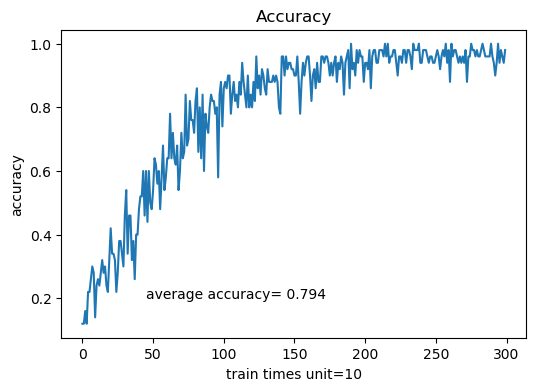

In [3]:
# 可视化 - 准确率

x = _train_info_dict["Accs"].shape[0]
x = np.linspace(0, x-1, x)
y = _train_info_dict["Accs"]

plt.figure(figsize=(6, 4))

plt.title("Accuracy")

plt.annotate(
    s="average accuracy= %.3f" % y.mean(),
    xy=(1, 0.2),
    xytext=(45, 0.2),
)

plt.xlabel("train times unit=10")
plt.ylabel("accuracy")

plt.plot(x, y)

print(y[40])

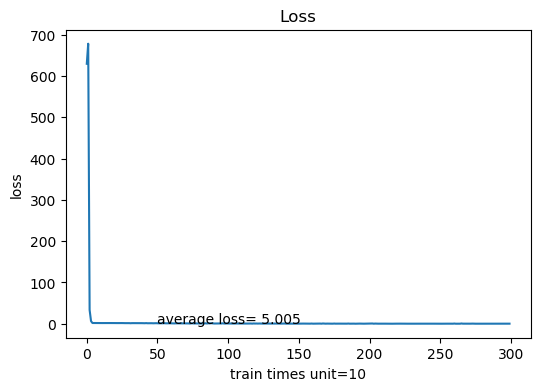

In [4]:
# 可视化 - 损失

x = _train_info_dict["Costs"].shape[0]
x = np.linspace(0, x-1, x)
y = _train_info_dict["Costs"]

plt.figure(figsize=(6, 4))

plt.title("Loss")

plt.annotate(
    s="average loss= %.3f" % y.mean(),
    xy=(50, 0.3),
    xytext=(50, 2),
)

plt.xlabel("train times unit=10")
plt.ylabel("loss")

plt.plot(x, y)


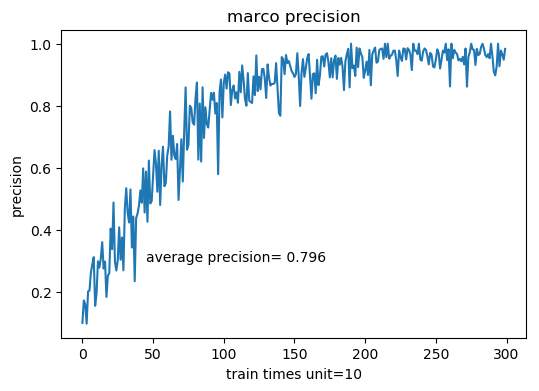

In [5]:
# 可视化 - 精确率

x = _train_info_dict["Marco_precisions"].shape[0]
x = np.linspace(0, x-1, x)
y = _train_info_dict["Marco_precisions"]

plt.figure(figsize=(6, 4))

plt.title("marco precision")

plt.annotate(
    s="average precision= %.3f" % y.mean(),
    xy=(50, 0.2),
    xytext=(45, 0.3),
)

plt.xlabel("train times unit=10")
plt.ylabel("precision")

plt.plot(x, y)


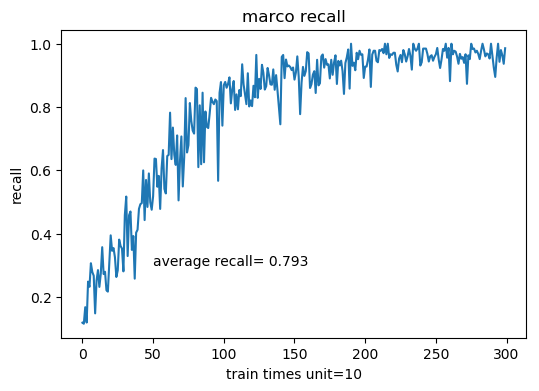

In [6]:
# 可视化 - 召回率

x = _train_info_dict["Marco_recalls"].shape[0]
x = np.linspace(0, x-1, x)
y = _train_info_dict["Marco_recalls"]

plt.figure(figsize=(6, 4))

plt.title("marco recall")

plt.annotate(
    s="average recall= %.3f" % y.mean(),
    xy=(50, 0.2),
    xytext=(50, 0.3),
)

plt.xlabel("train times unit=10")
plt.ylabel("recall")

plt.plot(x, y)


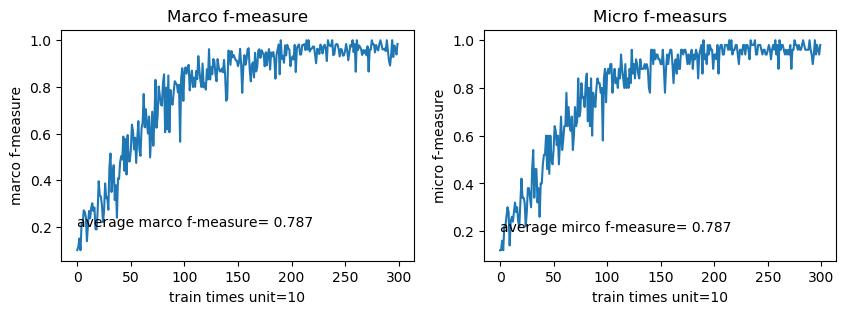

In [7]:
# 可视化 marco-f-measure 和 micro-f-measure

x = _train_info_dict["Marco_f_measures"].shape[0]
x = np.linspace(0, x-1, x)

y_marco = _train_info_dict["Marco_f_measures"]
y_micro = _train_info_dict["Micro_f_measures"]

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title("Marco f-measure")

plt.annotate(
    s="average marco f-measure= %.3f" % y_marco.mean(),
    xy=(50, 0.2),
    xytext=(0, 0.2),
)

plt.xlabel("train times unit=10")
plt.ylabel("marco f-measure")

plt.plot(x, y_marco)


plt.subplot(1, 2, 2)
plt.title("Micro f-measurs")

plt.annotate(
    s="average mirco f-measure= %.3f" % y_marco.mean(),
    xy=(50, 0.2),
    xytext=(0, 0.2),
)

plt.xlabel("train times unit=10")
plt.ylabel("micro f-measure")

plt.plot(x, y_micro)


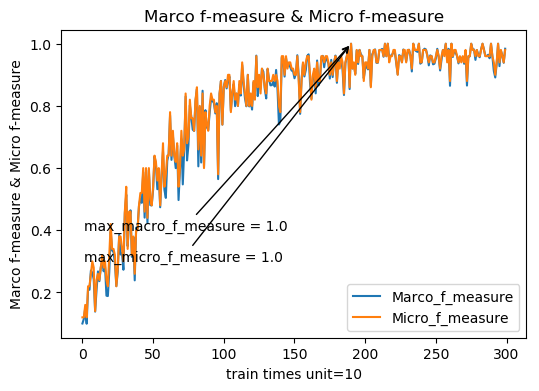

In [8]:
# 可视化 marco-f-measure 和 micro-f-measure 的对比
# 以及最大 marco-f-measure 和最大 micro-f-measure

x = _train_info_dict["Marco_f_measures"].shape[0]
x = np.linspace(0, x-1, x)

y_marco = _train_info_dict["Marco_f_measures"]
y_micro = _train_info_dict["Micro_f_measures"]

y_marco_max_index = np.argmax(y_marco)
y_micro_max_index = np.argmax(y_micro)

plt.figure(figsize=(6, 4))
plt.title("Marco f-measure & Micro f-measure")

plt.xlabel("train times unit=10")
plt.ylabel("Marco f-measure & Micro f-measure")

plt.plot(x, y_marco)
plt.plot(x, y_micro)

plt.annotate(
    s="max_macro_f_measure = {}".format( y_marco[y_marco_max_index] ),
    xy=(y_marco_max_index, y_marco[y_marco_max_index]),
    xytext=(1, 0.4),
    arrowprops={"arrowstyle": "->"}
)

plt.annotate(
    s="max_micro_f_measure = {}".format( y_marco[y_micro_max_index] ),
    xy=(y_micro_max_index, y_micro[y_micro_max_index]),
    xytext=(1, 0.3),
    arrowprops={"arrowstyle": "->"}
)

plt.legend(["Marco_f_measure", "Micro_f_measure"], loc=4)


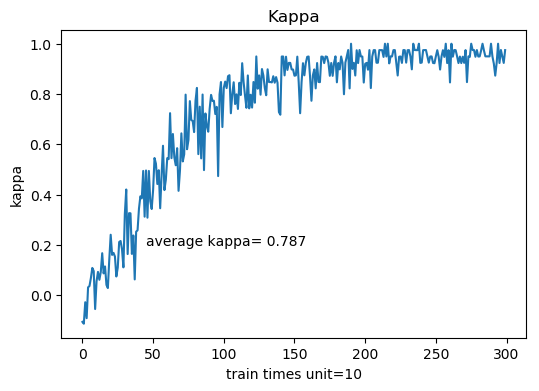

In [9]:
# 可视化 - Kappa 系数

x = _train_info_dict["Kappas"].shape[0]
x = np.linspace(0, x-1, x)
y = _train_info_dict["Kappas"]

plt.figure(figsize=(6, 4))

plt.title("Kappa")

plt.annotate(
    s="average kappa= %.3f" % y_marco.mean(),
    xy=(50, 0.2),
    xytext=(45, 0.2),
)

plt.xlabel("train times unit=10")
plt.ylabel("kappa")

plt.plot(x, y)
